In [1]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Data file 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
#The data is having no null values 

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
# There are no outliers in the Data

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
# No missing values

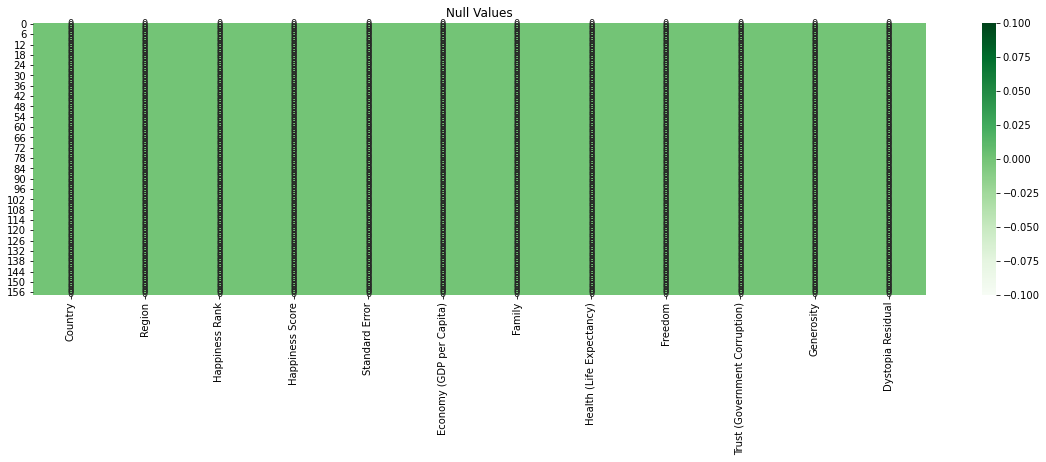

In [9]:
plt.figure(figsize=[20,5])
sns.heatmap(df.isnull(),cmap='Greens',annot=True)
plt.title('Null Values')
plt.show()

In [10]:
# No null values 

In [11]:
pd.set_option('Display.max_rows',None)

In [12]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [13]:
df=df.drop(['Country'],axis=1)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


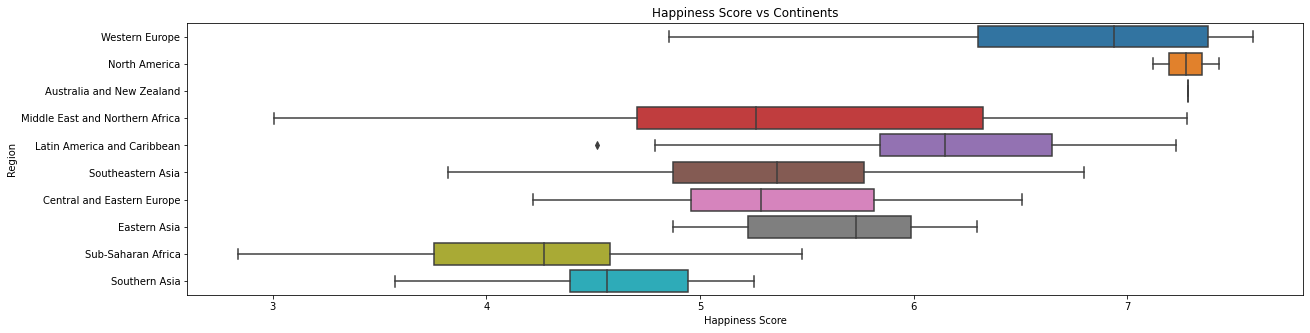

In [14]:
# Happiness score Vs Continents
plt.figure(figsize=[20,5])
sns.boxplot(df['Happiness Score'],df['Region'])
plt.title('Happiness Score vs Continents')
plt.show()

In [15]:
# Correlation between the Data

In [16]:
corr_=df.corr()
corr_

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


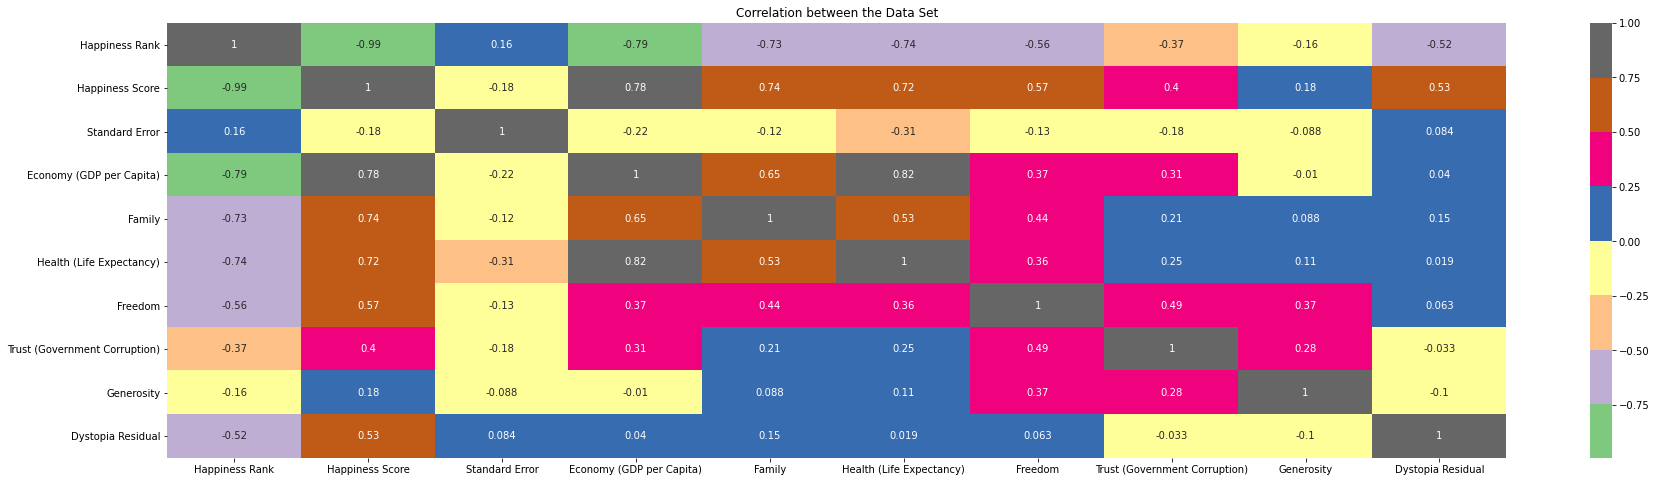

In [17]:
plt.figure(figsize=[30,8])
sns.heatmap(df.corr(),cmap='Accent',annot=True)
plt.title('Correlation between the Data Set')
plt.show()

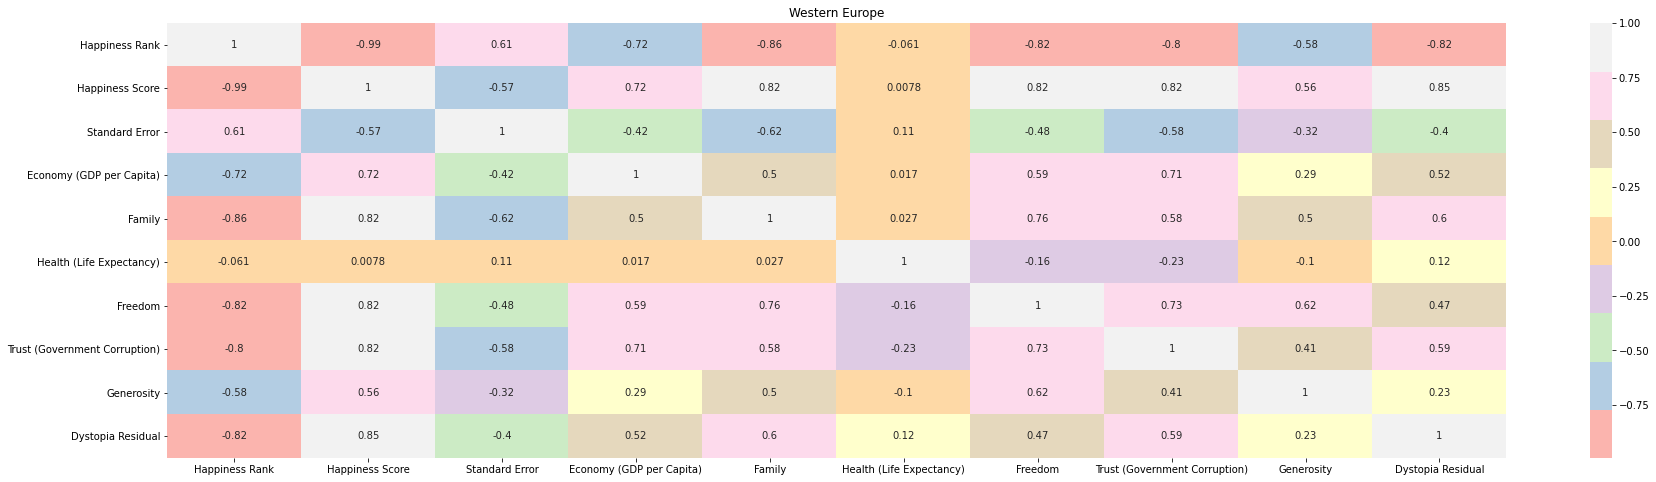

In [18]:
plt.figure(figsize=[30,8])
western=df.loc[lambda df:df['Region']=='Western Europe']
sns.heatmap(western.corr(),cmap="Pastel1",annot=True)
plt.title('Western Europe')
plt.show()

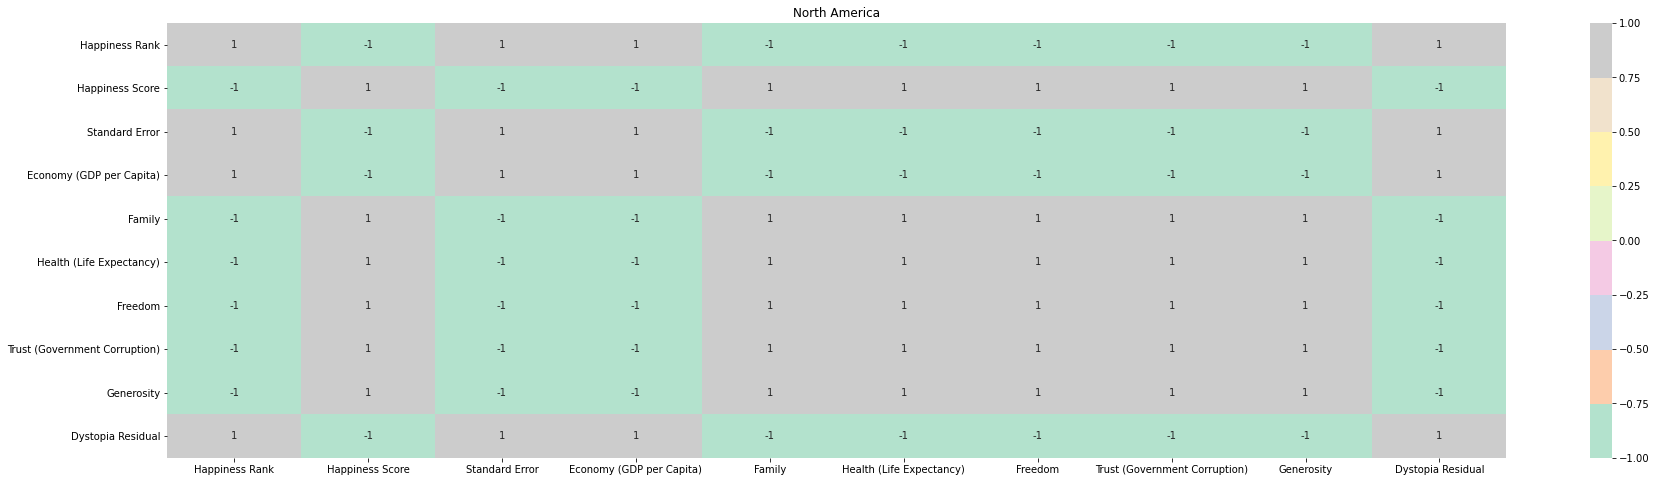

In [19]:
plt.figure(figsize=[30,8])
North_America=df.loc[lambda df:df['Region']=='North America']
sns.heatmap(North_America.corr(),cmap='Pastel2',annot=True)
plt.title('North America')
plt.show()

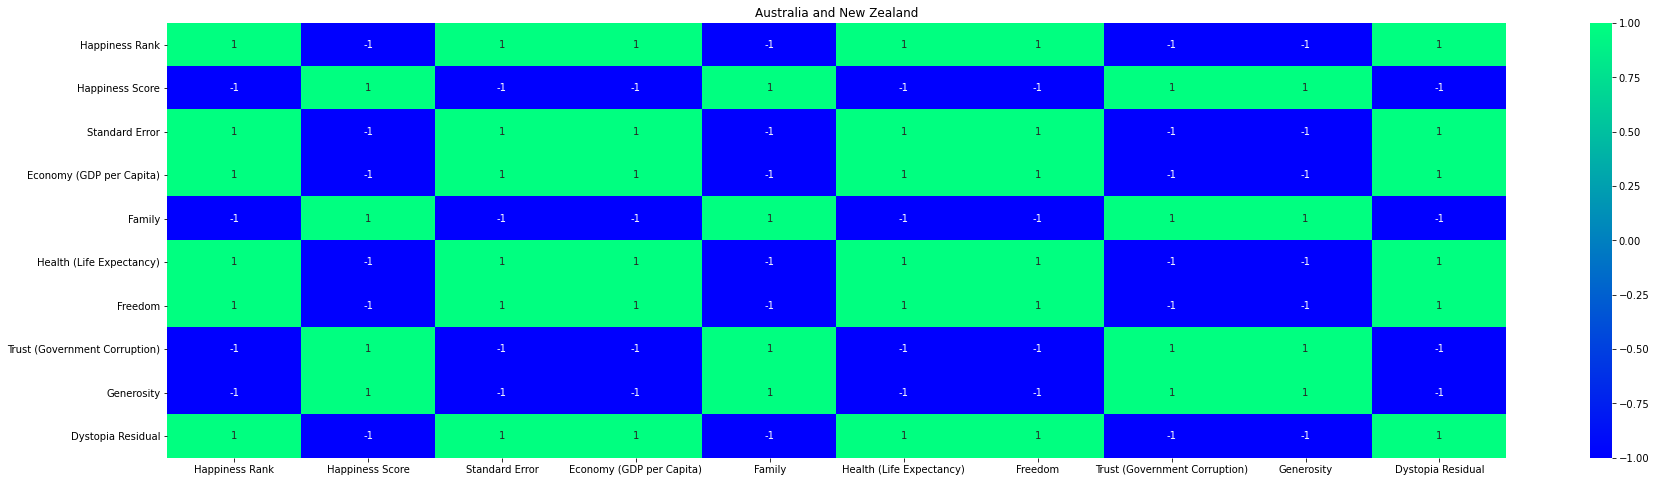

In [20]:
plt.figure(figsize=[30,8])
Aus_New=df.loc[lambda df:df['Region']=='Australia and New Zealand']
sns.heatmap(Aus_New.corr(),cmap='winter',annot=True)
plt.title('Australia and New Zealand')
plt.show()

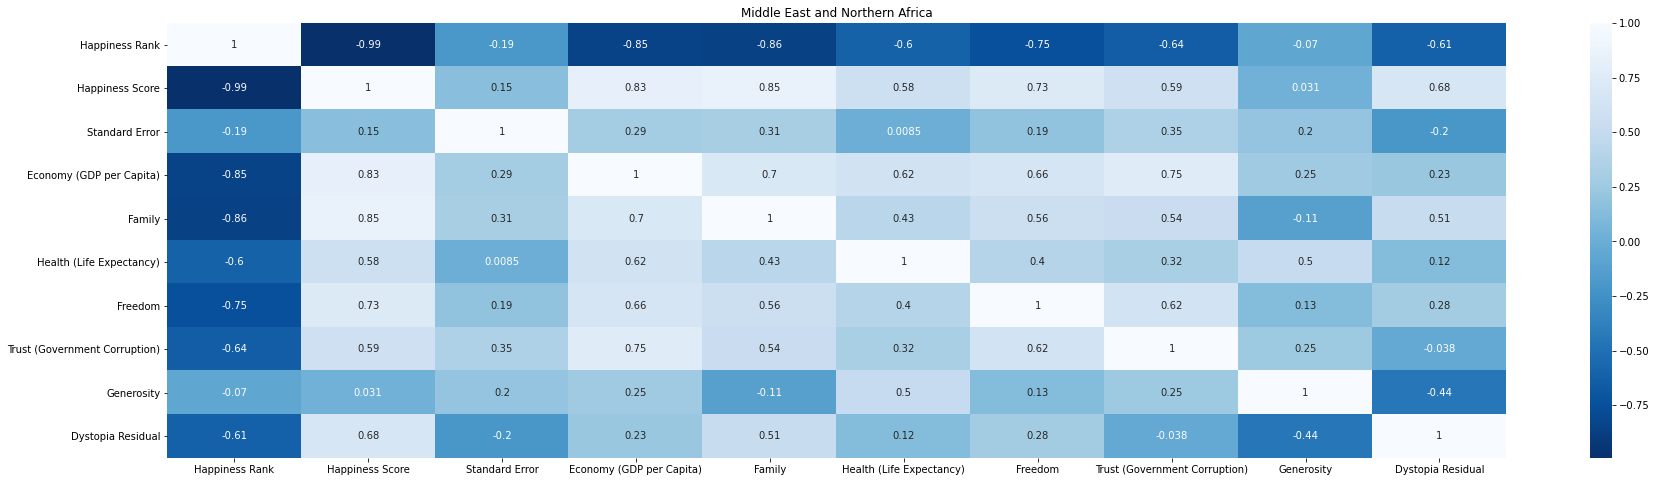

In [21]:
plt.figure(figsize=[30,8])
me_na=df.loc[lambda df:df['Region']=='Middle East and Northern Africa']
sns.heatmap(me_na.corr(),cmap='Blues_r',annot=True)
plt.title('Middle East and Northern Africa')
plt.show()

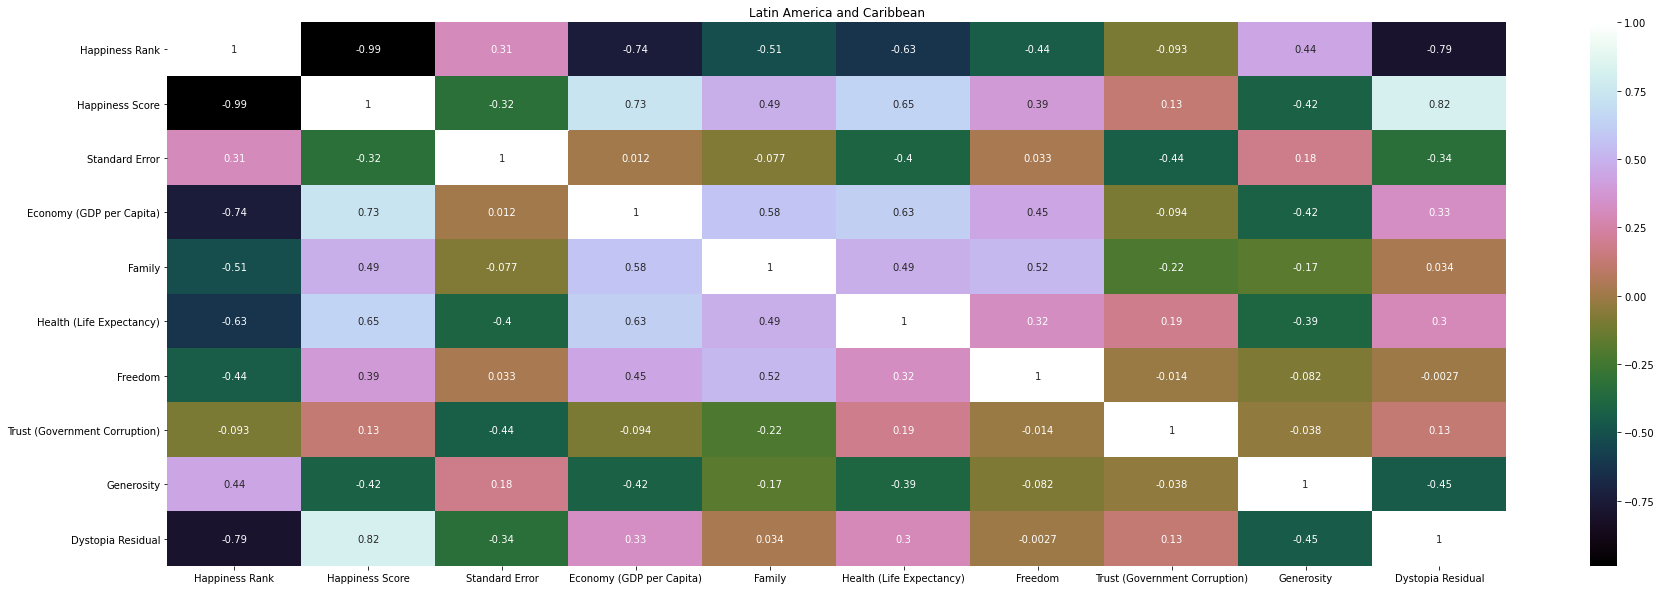

In [22]:
plt.figure(figsize=[30,10])
Latin_America_Caribbean=df.loc[lambda df:df['Region']=='Latin America and Caribbean']
sns.heatmap(Latin_America_Caribbean.corr(),cmap='cubehelix',annot=True)
plt.title('Latin America and Caribbean')
plt.show()

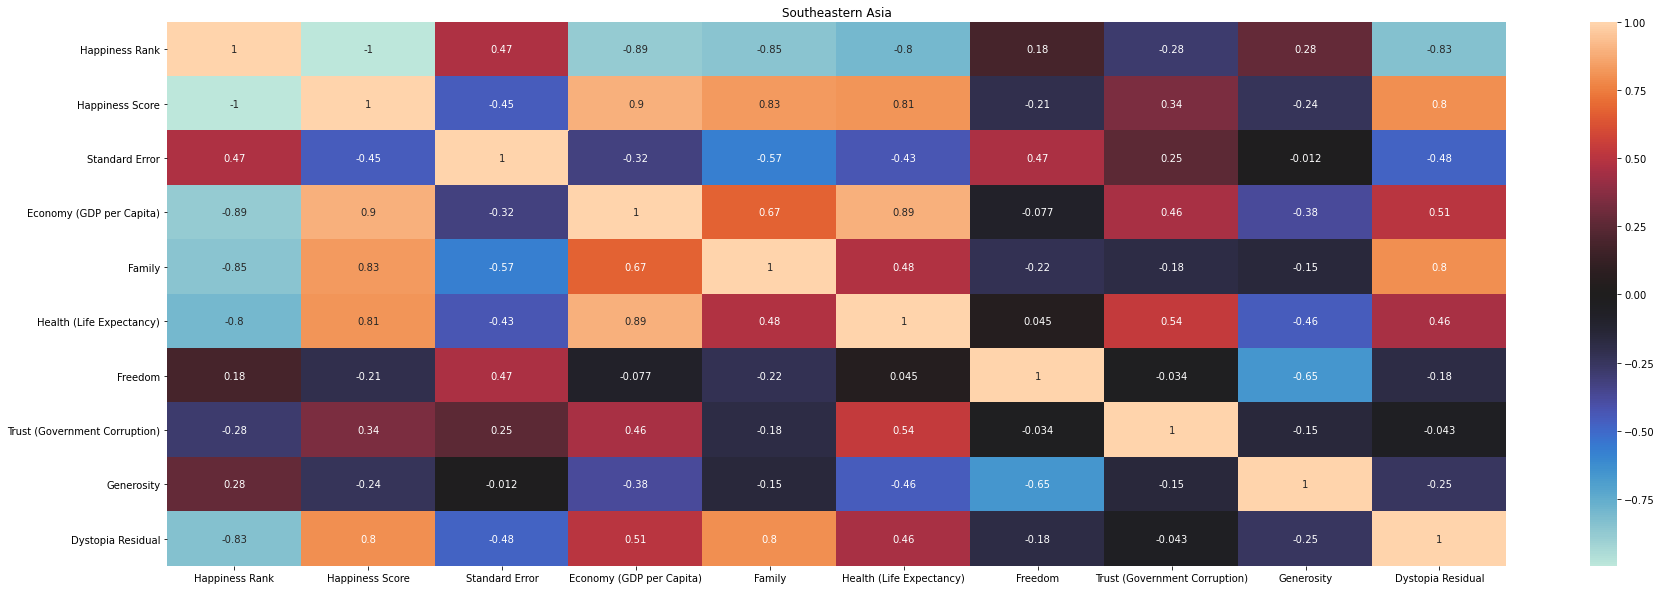

In [23]:
plt.figure(figsize=[30,10])
Southeastern_Asia=df.loc[lambda df:df['Region']=='Southeastern Asia']
sns.heatmap(Southeastern_Asia.corr(),cmap="icefire",annot=True)
plt.title('Southeastern Asia')
plt.show()

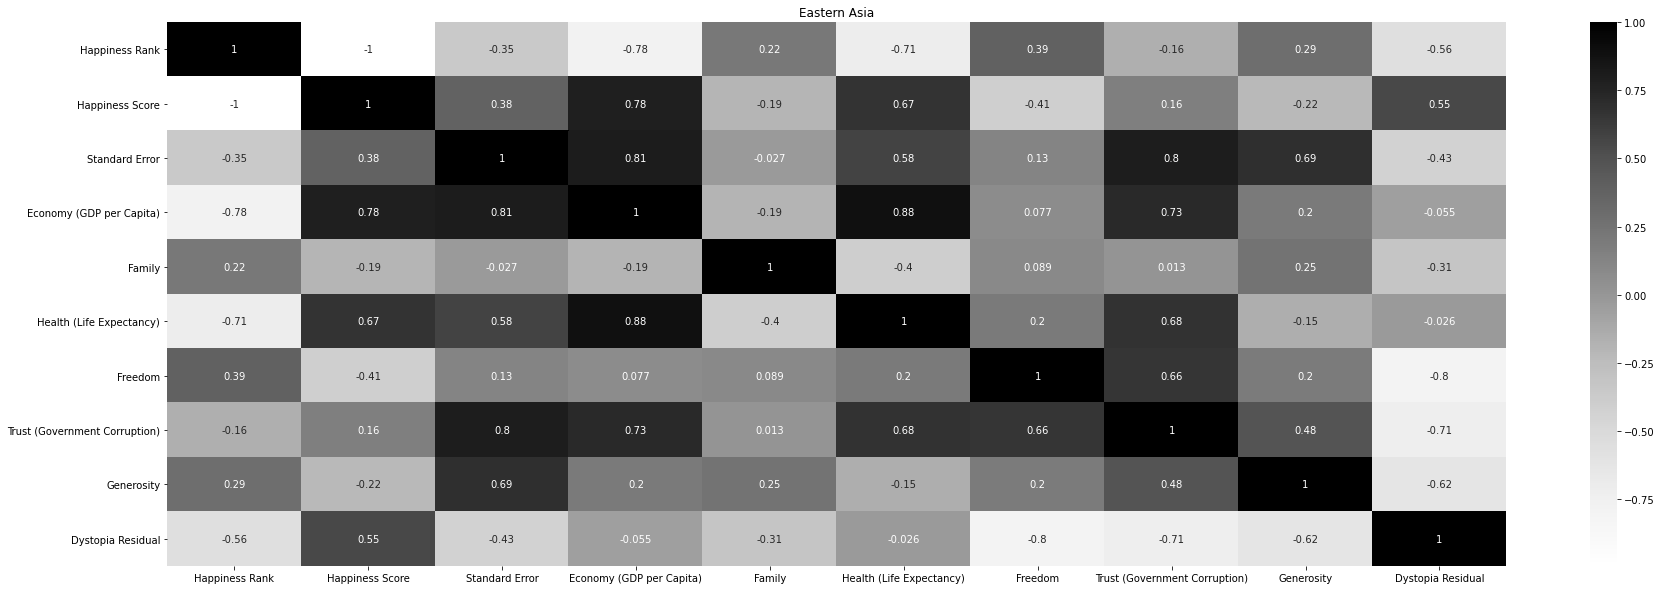

In [24]:
plt.figure(figsize=[30,10])
Eastern_Asia=df.loc[lambda df:df['Region']=='Eastern Asia']
sns.heatmap(Eastern_Asia.corr(),cmap='Greys',annot=True)
plt.title('Eastern Asia')
plt.show()

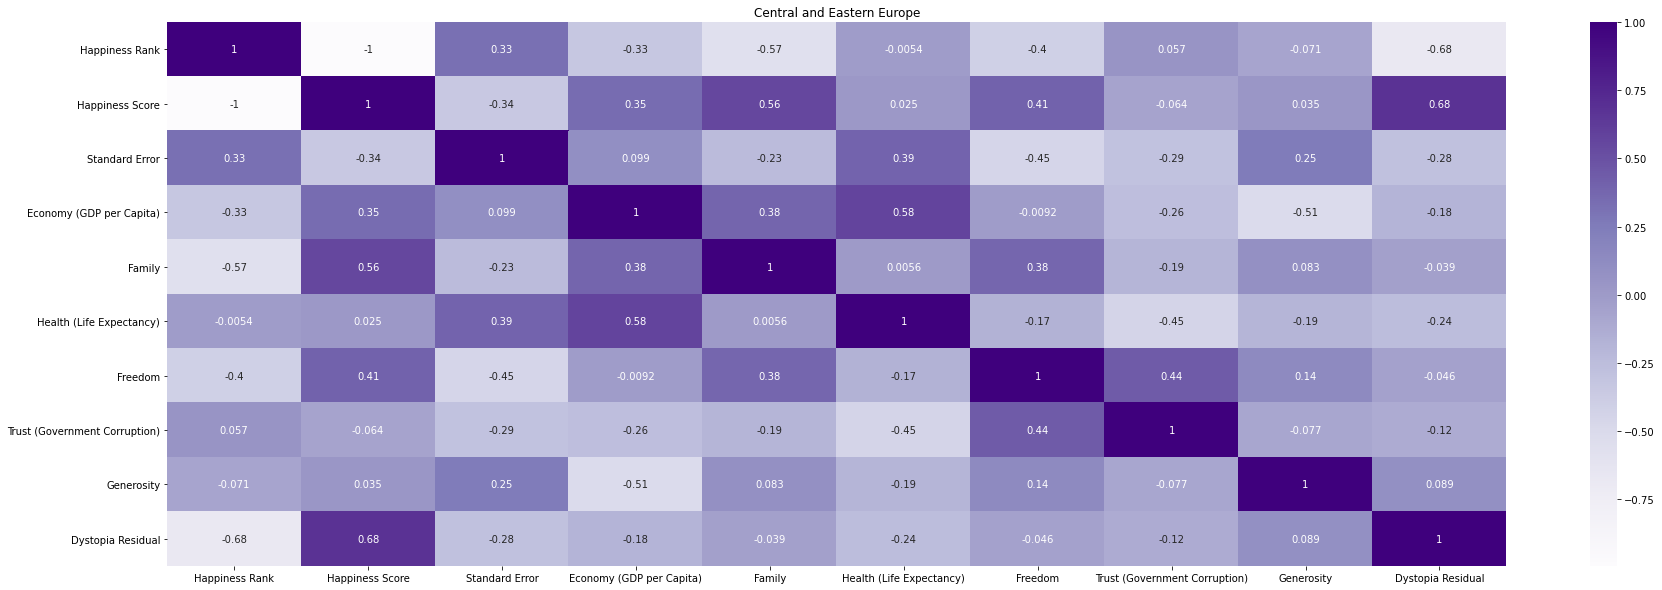

In [25]:
plt.figure(figsize=[30,10])
Central_and_Eastern_Europe=df.loc[lambda df:df['Region']=='Central and Eastern Europe']
sns.heatmap(Central_and_Eastern_Europe.corr(),cmap='Purples',annot=True)
plt.title('Central and Eastern Europe')
plt.show()

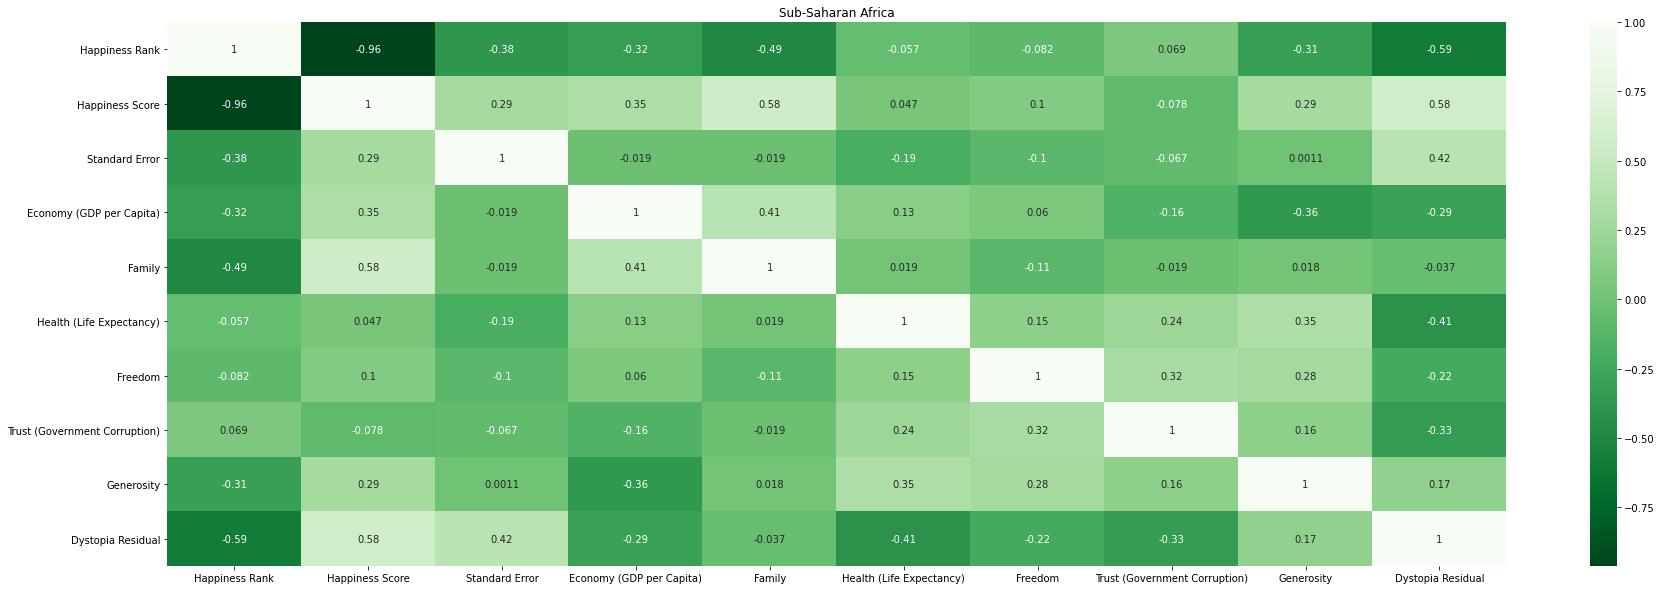

In [26]:
plt.figure(figsize=[30,10])
Sub_Saharan_Africa=df.loc[lambda df:df['Region']=='Sub-Saharan Africa']
sns.heatmap(Sub_Saharan_Africa.corr(),cmap='Greens_r',annot=True)
plt.title('Sub-Saharan Africa')
plt.show()

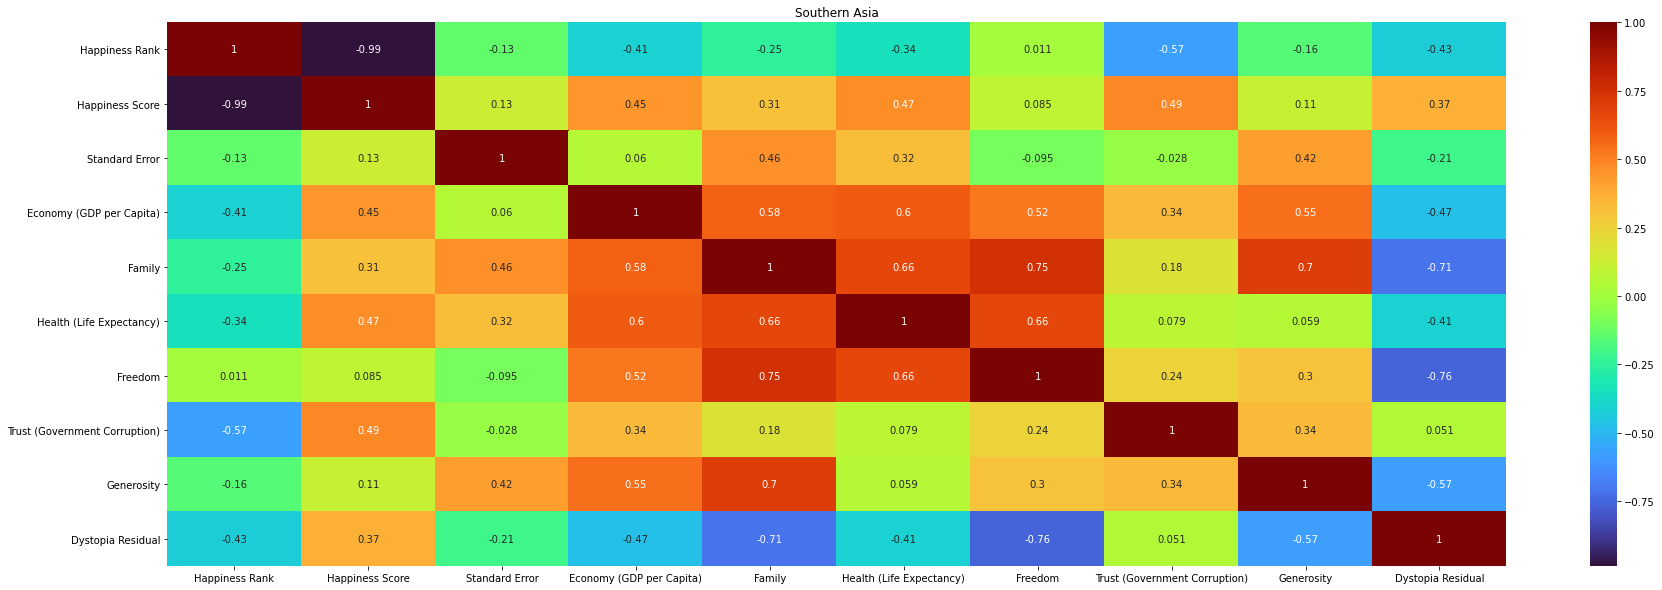

In [27]:
plt.figure(figsize=[30,10])
Southern_Asia=df.loc[lambda df:df['Region']=='Southern Asia']
sns.heatmap(Southern_Asia.corr(),cmap='turbo',annot=True)
plt.title('Southern Asia')
plt.show()

In [28]:
df['Region'].value_counts()
df['Happiness Score'].value_counts()

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
6.937    1
4.694    1
3.681    1
4.350    1
6.611    1
3.006    1
4.949    1
3.575    1
5.975    1
5.960    1
6.574    1
4.677    1
4.874    1
7.561    1
4.077    1
4.839    1
6.983    1
4.681    1
5.194    1
6.168    1
6.505    1
4.419    1
5.759    1
5.332    1
6.003    1
5.754    1
6.798    1
5.689    1
6.298    1
6.411    1
3.655    1
5.548    1
5.212    1
4.715    1
6.329    1
3.340    1
3.781    1
5.848    1
4.512    1
4.297    1
5.878    1
3.995    1
4.885    1
3.667    1
5.360    1
5.102    1
3.587    1
4.686    1
5.995    1
6.853    1
7.522    1
6.786    1
4.786    1
7.527    1
6.485    1
3.678    1
4.565    1
6.269    1
6.810    1
4.194    1
6.946    1
5.429    1
7.226    1
5.399    1
6.123    1
5.890    1
4.876    1
5.007    1
5.855    1
3.956    1
5.770    1
5.605    1
4.518    1
4.788    1
6.940    1
5.987    1
5.824    1
5.716    1
5.833    1
4.739    1
3.465    1
2.905    1
4.971    1
6.295    1
4.959    1
6.302    1

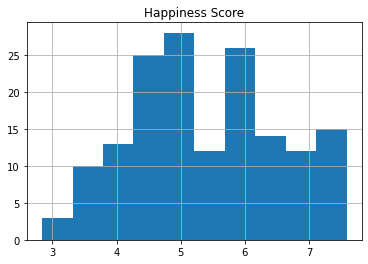

In [29]:
df['Happiness Score'].hist(grid=True)
plt.title('Happiness Score')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


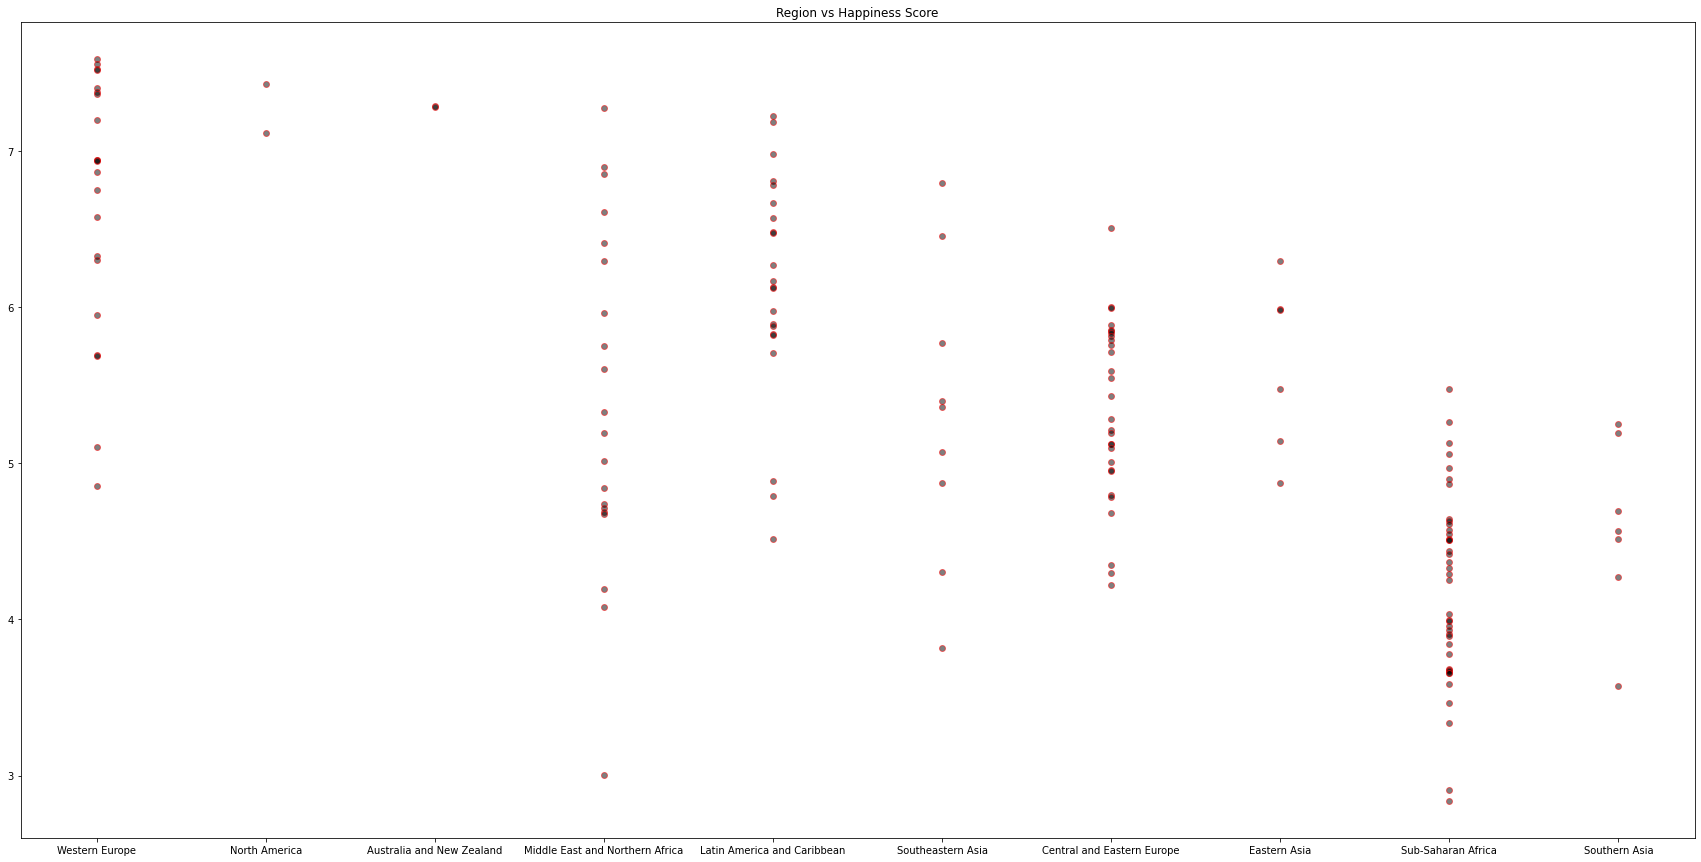

In [30]:
plt.figure(figsize=[30,15])
plt.scatter(df['Region'],df['Happiness Score'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Region vs Happiness Score')
plt.show()

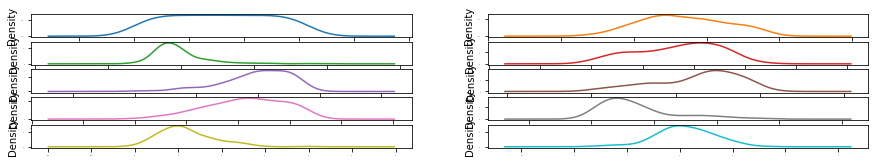

In [31]:
df.plot(kind='density',subplots=True,layout=(10,2),sharex=False,legend=False,fontsize=1,figsize=(15,5))
plt.show()

In [32]:
x=df.drop('Region',axis=1)
y=df['Region']

In [33]:
x.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [34]:
from sklearn.preprocessing import power_transform

In [35]:
df_new=power_transform(x)

In [36]:
df_new

array([[-2.06341393,  1.85703443, -0.9722262 , ...,  1.7739906 ,
         0.62239051,  0.75099154],
       [-2.00849761,  1.83666843,  0.30934971, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.95857395,  1.81000179, -1.06201663, ...,  1.90679206,
         0.92797276,  0.70227525],
       ...,
       [ 1.52535242, -2.2071803 ,  0.39913743, ...,  0.73891461,
         1.65933595, -2.86621553],
       [ 1.54254416, -2.31217751,  1.92690191, ..., -0.15194623,
        -0.19482942, -0.51480136],
       [ 1.55970548, -2.38132669,  1.31032295, ..., -0.06732622,
        -0.49041465, -0.97664547]])

In [37]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [38]:
df_new.skew()

Happiness Rank                  -0.264365
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

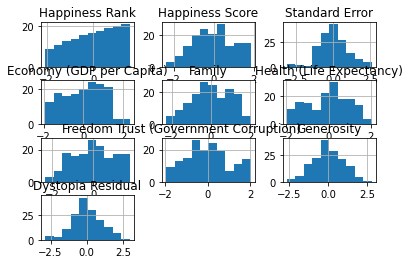

In [39]:
df_new.hist(grid=True)
plt.title('Scewed Data')
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
for i in range (1,200):
    x_train,y_train_x_test,y_test=train_test_split(x,y,test_size=0.30,random_state=i)

ValueError: too many values to unpack (expected 3)